In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
#Checking out the data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
#Looking at the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#looking at all the unique zip codes and then counting the top 5 most common zips
df['zip'].unique()
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#Number of unique case titles
df['title'].nunique()

110

In [9]:
#We want to split the case titles into three categories, EMS, Fire, and Traffic.
#So apply a function to split the titles at the ':' and we take the first element
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [10]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

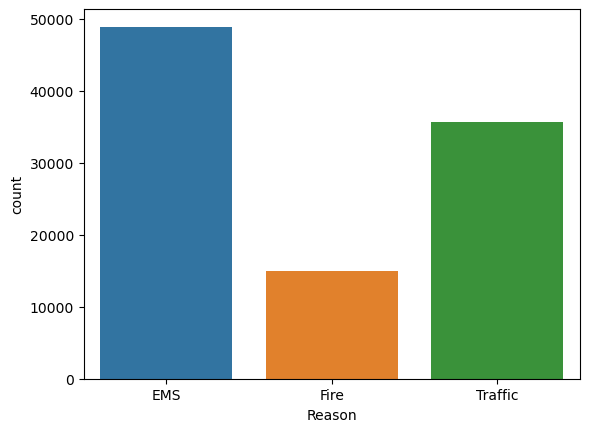

In [12]:
#We plot the counts of each reason in the dataset and we see that EMS and traffic 
#are much higher than fire
sns.countplot(x = 'Reason', data = df)

In [13]:
#we check what the type of data is in this time column
type(df['timeStamp'].iloc[0])

str

In [14]:
#converting a string to a timestamp
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
time = df['timeStamp'].iloc[0]

In [17]:
time.hour

17

In [18]:
#This creates 3 new columns based on the timestamp, showing the hour, month, 
#and day of week of a call
df['Hour'] = df['timeStamp'].apply(lambda timeStamp:timeStamp.hour)
df['Month'] = df['timeStamp'].apply(lambda timeStamp:timeStamp.month)
df['Day of Week'] = df['timeStamp'].apply(lambda timeStamp:timeStamp.dayofweek)

In [19]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [20]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
#We use this to change the day of week from a number to a string day instead
df['Day of Week'] = df['Day of Week'].map(dmap)

In [22]:
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

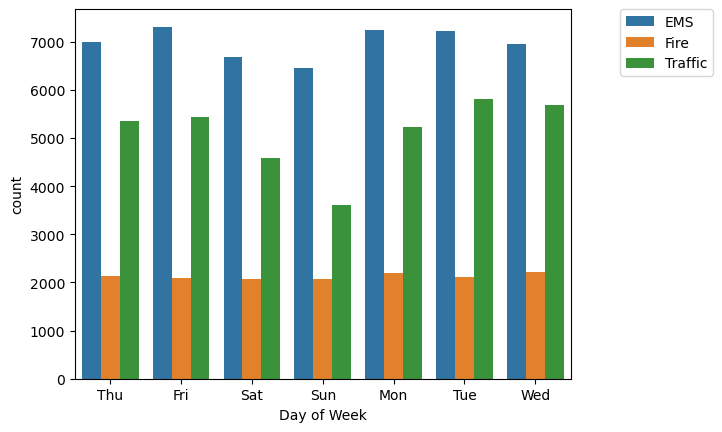

In [23]:
#this graph displays the number of calls per day of the week, separated further into 
#the type of emergency
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor = (1.1, 1), loc = 'upper left', borderaxespad=0)

<AxesSubplot:xlabel='Month', ylabel='count'>

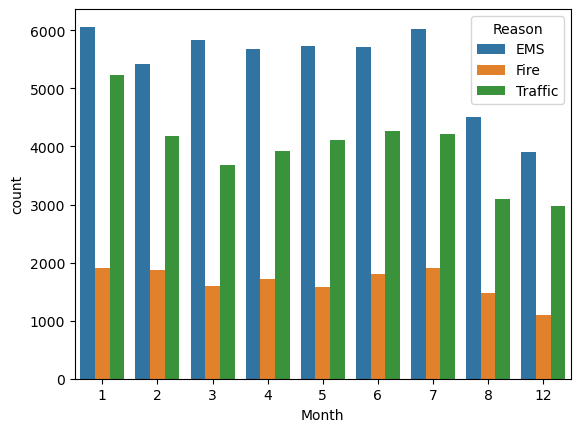

In [24]:
#this graph displays the number of calls per month separated by emergency type
sns.countplot(x = 'Month', data = df, hue = 'Reason')

In [25]:
byMonth = df.groupby('Month').count()

<AxesSubplot:xlabel='Month'>

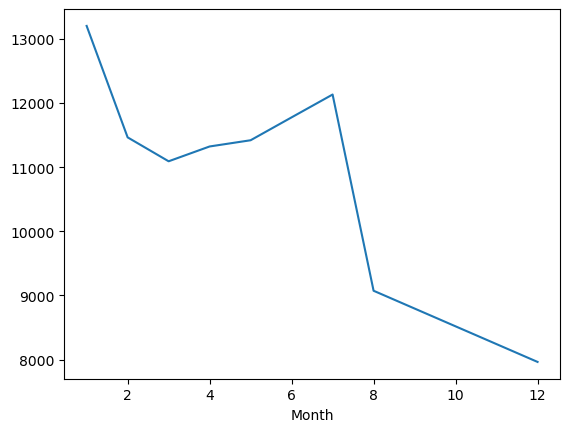

In [26]:
#This data is actually missing months 9, 10, and 11, so we use this graph to 
#fill in the missing data
byMonth['twp'].plot()

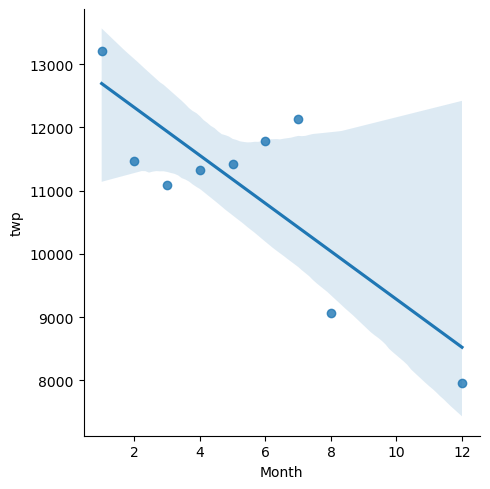

In [27]:
#this shows an lmplot with out data. You can see the variance increases significantly
#for the months that we have no data
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

In [28]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())

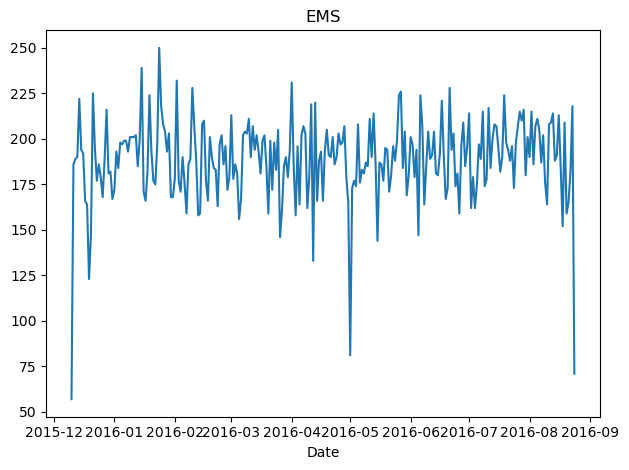

In [29]:
#Below are a few graphs to showcase different stats
#this graph is number of EMS calls per month
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

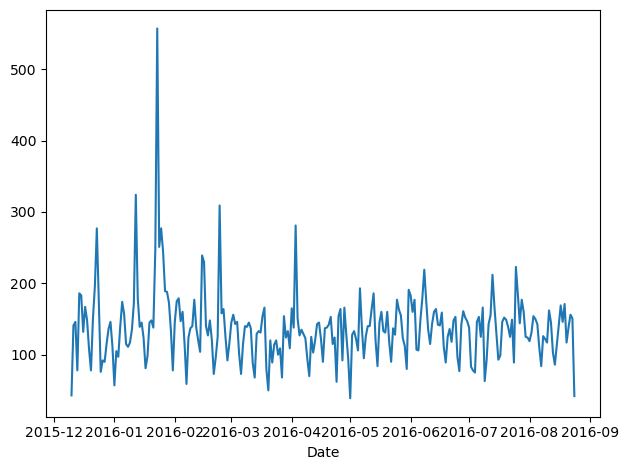

In [30]:
#this graph is number of traffic emergency calls per month
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

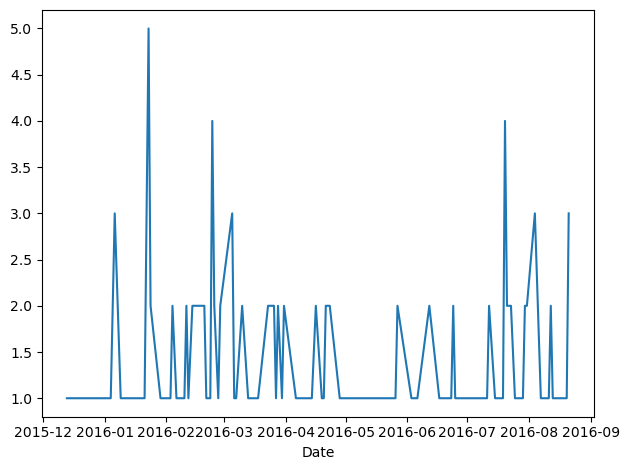

In [31]:
#this graph is number of fire emergency calls located in New Hanover per month
df[(df['Reason'] == 'Fire') & (df['twp'] == 'NEW HANOVER')].groupby('Date').count()['twp'].plot()
plt.tight_layout()

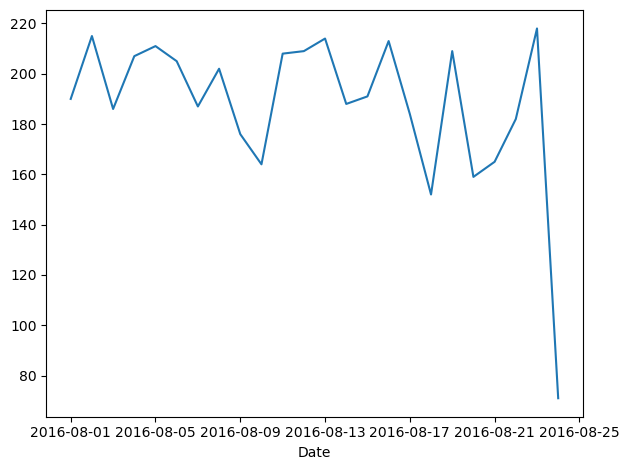

In [32]:
#lastly, this is the number of EMS calls in the month of August
df[(df['Reason'] == 'EMS') & (df['Month'] == 8)].groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [33]:
#this creates a new dataframe that has the hour and days of the week as indexes 
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

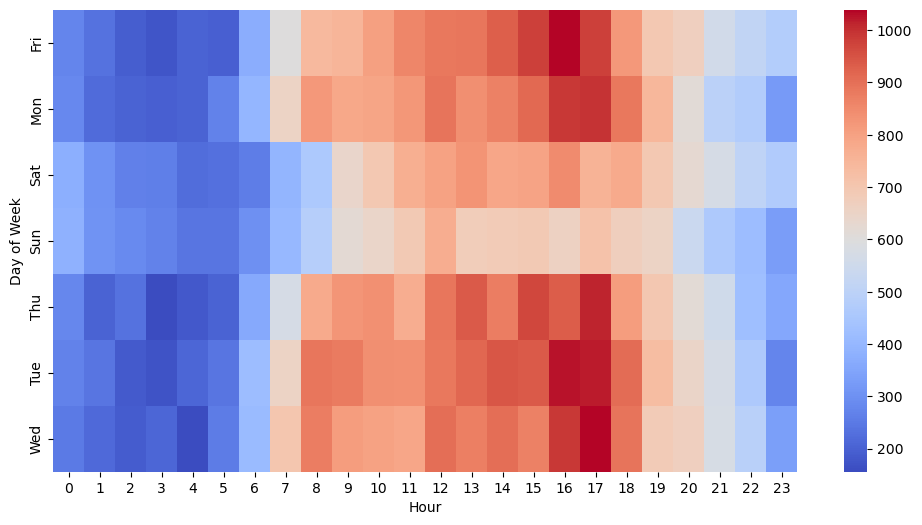

In [34]:
#this is a heatmap to see where the most calls take place. It looks like most 
#calls occur during the day time on weekdays 
plt.figure(figsize = (12,6))
sns.heatmap(dayHour, cmap = 'coolwarm')

<Figure size 1200x600 with 0 Axes>

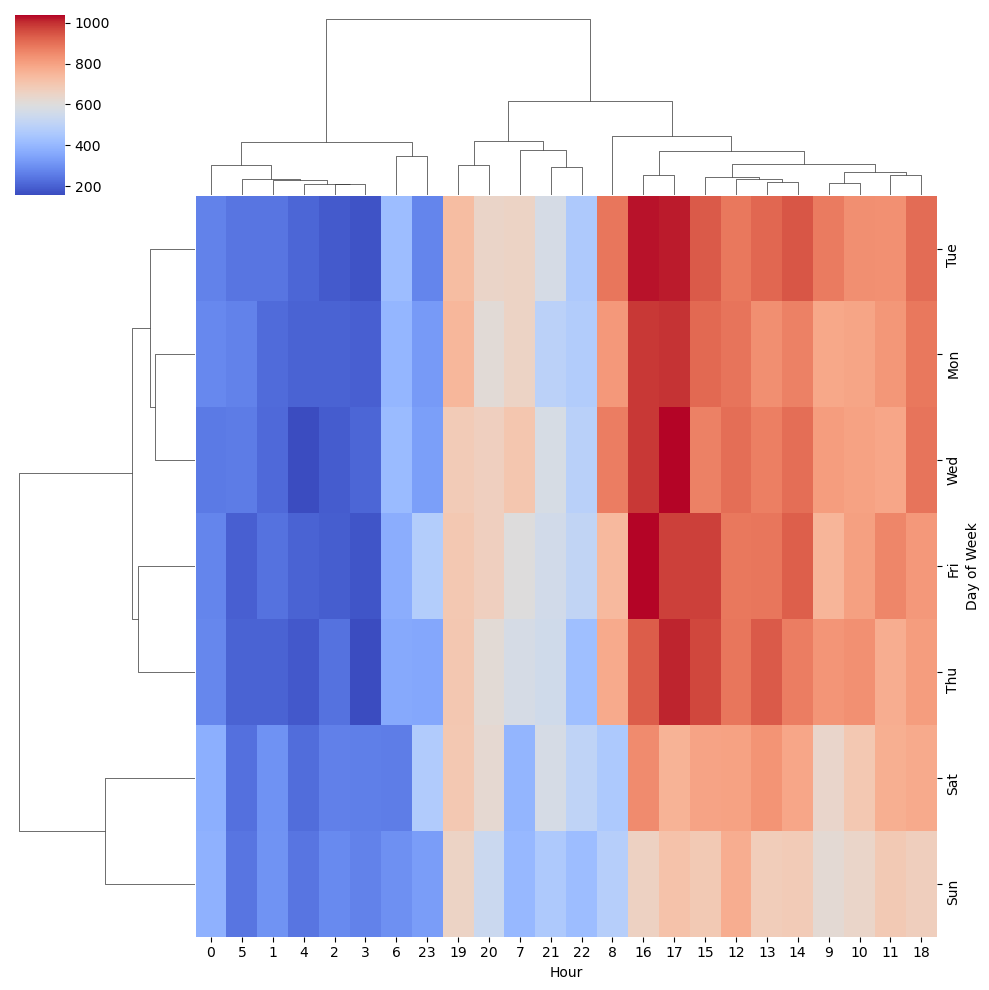

In [35]:
plt.figure(figsize = (12,6))
sns.clustermap(dayHour, cmap = 'coolwarm')

In [36]:
#this is similar to the data frame we created above, except we use the month 
#as an index instead of hour of the day
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['twp'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

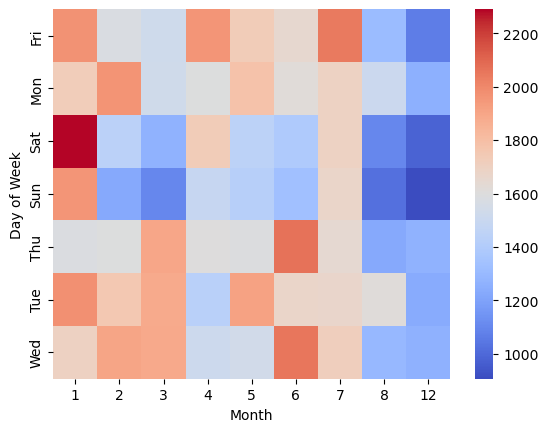

In [37]:
sns.heatmap(dayMonth, cmap = 'coolwarm')

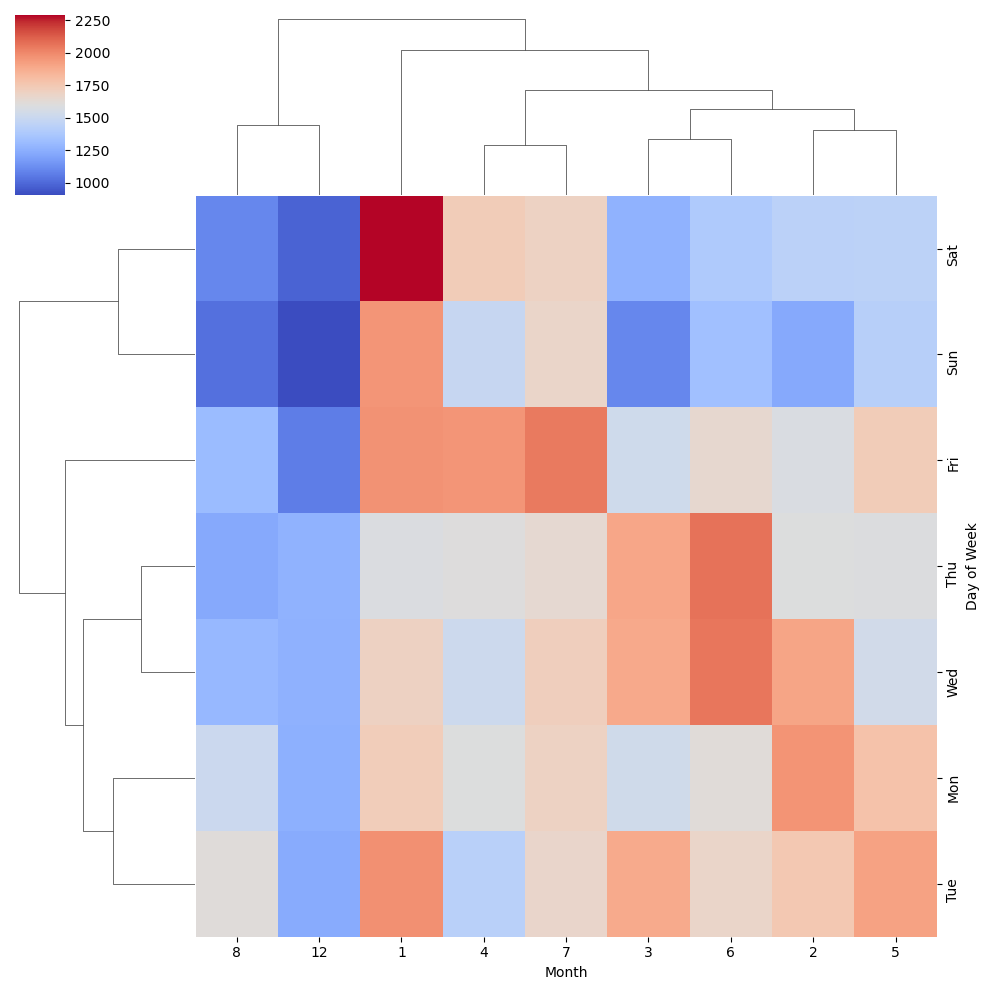

In [38]:
sns.clustermap(dayMonth, cmap = 'coolwarm')